In [2]:
#!/usr/bin/env python
from __future__ import division
from math import *
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np
from pylab import *

In [3]:
__author__  = "Eric Yeung"
__email__   = "eric.yeung@mail.utoronto.ca"

In [4]:
# QUESTION 1 A

In [5]:
theta = lambda z: pi - 2*asin(z)

In [6]:
theta(0.25)

2.636232143305636

In [7]:
# QUESTION 1 C

In [8]:
N = 5000 # number of particles
z = np.random.uniform(-1,1,N)
t = map(lambda z:pi-2*asin(z), z)
tr = np.array(t)

In [9]:
# Firstrange 170*pi/180 < theta < 190*pi/180
# Secondrange 90*pi/180 < theta < 110*pi/180

FirstRange = ((170*pi/180 < tr) & (tr < 190*pi/180)).sum()
SecondRange = ((90*pi/180 < tr) & (tr < 110*pi/180)).sum()

print "%s scattering angles lie between 170 degrees and 190 degrees." % FirstRange
print "%s scattering angles lie between 90 degrees and 110 degrees." % SecondRange

relativeprob = SecondRange/FirstRange

print "The probability of finding the particle in the range(170,190) relative to the range(90,110) is %s for N = %s" % (relativeprob, N)

407 scattering angles lie between 170 degrees and 190 degrees.
326 scattering angles lie between 90 degrees and 110 degrees.
The probability of finding the particle in the range(170,190) relative to the range(90,110) is 0.800982800983 for N = 5000


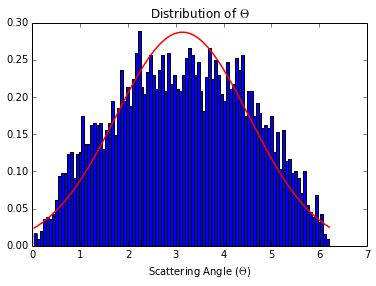

In [18]:
import scipy.stats as stats

# Plot a gaussian to compare to uniform dist. 

gaussian = stats.norm.pdf(sorted(tr), np.mean(sorted(tr)), np.std(sorted(tr))) 
plt.plot(sorted(tr), gaussian, color = 'red', ls = '-', linewidth = '1.5')

# Plot the histogram with 100 bins

plt.hist(tr, bins = 100, color='b', normed = True)

plt.xlabel('Scattering Angle ($\Theta$)')
plt.title('Distribution of $\Theta$')

In [11]:
# Question 2 B

1.33226762955e-15
-1.23789867246e-14


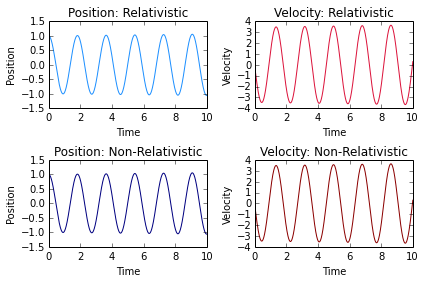

In [12]:
# Define some parameters

k = 12.
m = 1. # in metres 
c = 2.998e8
dt = 0.001 # timestep
ti = 0.
tf = 10.

time=arange(ti,tf,dt) # Define time array
tlen=len(time) # Gives us the dimension/length of the array

# Create empty arrays of dimension tlen 

x = np.zeros(tlen)
v = np.zeros(tlen)

# initial conditions

x[0] = 1
v[0] = 0

# Initial index value

i = 0

# Euler Method

while i < tlen-1:
    x[i+1] = x[i] + v[i]*dt
    v[i+1] = v[i] - k/m*x[i]*(1- (v[i])**2/c**2)**(3/2)*dt
    i += 1



# With no relativistic effects, the v^2/c^2 -> 0 in our ODE above. This makes our system a lot cleaner and simple! 
# Define new variables xn, vn for non-relativistic position and velocities respectively. 

xn = np.zeros(tlen)
vn = np.zeros(tlen)

xn[0] = 1
vn[0] = 0

# Different indices, so no confusion

j = 0 

# Euler Method again, straightforward

while j < tlen-1: 
    xn[j+1] = xn[j] + vn[j]*dt
    vn[j+1] = vn[j] - k/m*xn[j]*dt
    j += 1

# Show explicitly the difference after time evolution

print x[9999] - xn[9999] # Let the system evolve until the limit (1e4)
print v[9999] - vn[9999]

# Plot everything

f, ((ax1, ax3), (ax2, ax4)) = plt.subplots(2, 2, sharex='row', sharey='col')
ax1.plot(time, x, color='dodgerblue')
ax1.set_title('Position: Relativistic')

ax2.plot(time, xn, color='navy')
ax2.set_title('Position: Non-Relativistic')

ax3.plot(time, v, color='crimson')
ax3.set_title('Velocity: Relativistic')

ax4.plot(time, vn, color='darkred')
ax4.set_title('Velocity: Non-Relativistic')

ax1.set_xlabel('Time')
ax2.set_xlabel('Time')
ax3.set_xlabel('Time')
ax4.set_xlabel('Time')

ax1.set_ylabel('Position')
ax2.set_ylabel('Position')
ax3.set_ylabel('Velocity')
ax4.set_ylabel('Velocity')

plt.tight_layout()
#plt.savefig('NR_R_graphs.png', dpi=4000, bbox_inches="tight")
plt.show()


In [13]:
from random import random

zArray = []

Number = 100
for i in range(Number):
    zArray.append(uniform(-1,1))
print zArray

[0.7371329243191691, 0.8449981452771418, 0.06815009763633517, -0.19757143651626086, 0.9892147164045535, -0.5996727633398455, 0.30070236672881245, -0.3172453302489644, -0.06051289743830579, -0.7490580715750543, 0.10397354431568728, -0.8955182013862677, -0.2564876064386439, -0.33568884368388496, -0.7917956815780569, 0.47786786554273775, -0.060528785719768274, 0.7678044395095212, -0.6831374400874872, 0.5991455788697262, 0.43623107332999855, -0.6630374109893078, -0.01497657739974545, -0.9551994878504673, 0.21688913623160122, 0.8678348240185059, -0.4500917366680619, 0.4019612919189781, -0.2980468056234755, -0.44943874261077177, 0.8437517207000997, 0.10807355053979406, -0.898428788845735, 0.13006634642504689, -0.0024768556963405963, -0.5402801737116445, 0.31648215106882915, 0.053601727095930585, 0.47556004862265233, -0.4180817331117188, 0.7977468408078541, -0.5425509595614384, 0.009270214167260704, 0.29750856337175735, -0.2997567564230972, 0.8230467546169316, 0.42991551382862037, 0.758578582

In [14]:
thetaArray = []

for i in range(Number):
    thetaArray.append(pi-2*asin(zArray[i]))

print thetaArray

[1.4839573293964614, 1.128469256009549, 3.005186730946674, 3.539352459084368, 0.2940030830473779, 4.42777690495356, 2.530734614117794, 3.787239360186456, 3.262692432703263, 4.834870982523881, 2.933269061888855, 5.360781202317383, 3.6603656187051334, 3.8262654785584553, 4.969079398198784, 2.145140853990447, 3.262724267621701, 1.3907782941902513, 4.645693067744507, 1.856725634408552, 2.2387807848635206, 4.591330726901287, 3.171546928240459, 5.682258813691034, 2.704339420601295, 1.0399370279879134, 4.075328787696172, 2.3142770678672493, 3.746884268227885, 4.073866555343011, 1.1331222495118842, 2.925022563026761, 5.373949086767009, 2.8807208650766025, 3.146546370047505, 4.283132704130843, 2.4975552300426265, 3.034337797731454, 2.1503915130358733, 4.004257883151951, 1.2944940565526937, 4.2885344848033204, 3.1230519596939366, 2.5374286785687383, 3.7504680049544095, 1.2080834350787486, 2.252794254316297, 1.4193349585407398, 2.480872647729976, 4.155144997561717, 1.5152788583946173, 4.803806147

In [15]:
p1 = 0
p2 = 0

In [16]:
for i in range(Number):
    if 2 <= thetaArray[i] <= 3:
        p1 += 1 
    elif 3 <= thetaArray[i] <= 5:
        p2 += 1
    else: 
        pass

In [17]:
print p1 
print p2 

25
51
